In [2]:
import torch
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
sp500 = ''.join(open('~/.../S&P500.txt').readlines()).strip().split('\n')
sp500.sort()

In [ ]:
hist_dict = {}
pbar = tqdm(total=len(sp500))
for ticker in sp500:
    try:
        hist = yf.Ticker(ticker).history(period="max")
        hist_dict[ticker] = hist
    except:
        continue
    pbar.update(1)

  4%|▍         | 21/505 [00:08<02:55,  2.76it/s]

## Historical closing prices from 2012 to present

In [ ]:
hist = pd.concat(hist_dict, axis=1)
hist = hist.iloc[hist.index.get_loc(datetime.datetime(2012,1,1),method='nearest'):]
hist = hist[[col for col in list(hist.columns) if col[1] == 'Close']]
del hist_dict
hist.to_pickle('~/.../SP500_2012_2021.pkl')
hist

In [4]:
hist = pd.read_pickle('~/.../SP500_2012_2021.pkl')
hist

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,23.848188,4.826837,66.431709,12.591938,NaN,32.449615,18.250000,22.172400,43.720493,28.570000,...,19.759584,26.523651,57.094891,33.212666,21.926779,34.782356,49.651501,35.720001,14.441826,NaN
2012-01-04,23.658602,4.741989,67.989174,12.659607,NaN,32.560436,18.110001,22.086409,43.703983,28.280001,...,19.629501,26.245657,57.108166,33.203274,22.650694,35.019901,48.979530,35.450001,14.760457,NaN
2012-01-05,24.188129,5.156796,68.421799,12.800154,NaN,32.807610,18.270000,22.035582,42.870026,28.480000,...,19.716227,26.474594,56.935555,33.231441,22.327982,35.287136,49.559452,35.400002,15.173820,NaN
2012-01-06,24.449619,5.279352,68.739067,12.933964,NaN,32.892853,18.139999,21.836220,42.795719,28.719999,...,19.658407,26.302900,56.510662,33.034290,21.952953,35.542492,49.688309,35.110001,15.191044,NaN
2012-01-09,25.090279,5.392481,68.719833,12.913451,NaN,32.875797,18.209999,21.832314,42.721413,28.530001,...,19.672861,26.875235,56.762959,32.874714,22.040163,35.405914,50.056503,34.950001,15.397721,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-14,151.880005,16.910000,234.405685,174.330002,127.290001,123.300003,311.269989,132.940002,369.730011,614.859985,...,67.389999,209.809998,61.540001,53.139999,118.680000,131.990005,123.279999,585.859985,62.270000,228.070007
2021-12-15,154.309998,16.990000,238.139999,179.300003,130.229996,123.769997,315.459991,135.559998,375.299988,630.330017,...,68.820000,217.729996,61.270000,54.009998,119.750000,132.419998,120.680000,598.190002,62.759998,232.080002


In [6]:
hist_complete = hist[[k for k, v in dict(pd.isna(hist).sum(0) == 0).items() if v == True]]
hist_complete

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,23.848188,4.826837,66.431709,12.591938,32.449615,18.250000,22.172400,43.720493,28.570000,28.259459,...,85.516457,19.759584,26.523651,57.094891,33.212666,21.926779,34.782356,49.651501,35.720001,14.441826
2012-01-04,23.658602,4.741989,67.989174,12.659607,32.560436,18.110001,22.086409,43.703983,28.280001,28.220253,...,84.045784,19.629501,26.245657,57.108166,33.203274,22.650694,35.019901,48.979530,35.450001,14.760457
2012-01-05,24.188129,5.156796,68.421799,12.800154,32.807610,18.270000,22.035582,42.870026,28.480000,28.345745,...,83.167892,19.716227,26.474594,56.935555,33.231441,22.327982,35.287136,49.559452,35.400002,15.173820
2012-01-06,24.449619,5.279352,68.739067,12.933964,32.892853,18.139999,21.836220,42.795719,28.719999,28.157501,...,80.241577,19.658407,26.302900,56.510662,33.034290,21.952953,35.542492,49.688309,35.110001,15.191044
2012-01-09,25.090279,5.392481,68.719833,12.913451,32.875797,18.209999,21.832314,42.721413,28.530001,28.706539,...,80.016441,19.672861,26.875235,56.762959,32.874714,22.040163,35.405914,50.056503,34.950001,15.397721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-14,151.880005,16.910000,234.405685,174.330002,123.300003,311.269989,132.940002,369.730011,614.859985,176.279999,...,83.320000,67.389999,209.809998,61.540001,53.139999,118.680000,131.990005,123.279999,585.859985,62.270000
2021-12-15,154.309998,16.990000,238.139999,179.300003,123.769997,315.459991,135.559998,375.299988,630.330017,179.529999,...,82.709999,68.820000,217.729996,61.270000,54.009998,119.750000,132.419998,120.680000,598.190002,62.759998


In [7]:
m = 252 + 1
n = hist_complete.shape[1]
m, n

(253, 456)

In [8]:
def get_empirical_return(df, col, s_idx, e_idx):
    price = df[col].iloc[s_idx:e_idx].values
    empirical_returns = ((price[1:] - price[:-1])/price[:-1]).cumsum()
    return empirical_returns
    
def batch(df, m, n):
    e_idxs = np.random.randint(m, df.shape[0], n)
    s_idxs = e_idxs - m
    batch_ = np.zeros((n, m - 1), dtype=np.float32)
    for idx, (col, s_idx, e_idx) in enumerate(zip(df.columns, s_idxs, e_idxs)):
        batch_[idx] = get_empirical_return(df, col, s_idx, e_idx)
    return batch_

In [9]:
from tqdm.notebook import tqdm
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=3, batch_size=n)
epochs = 500
pbar = tqdm(total=epochs)
for i in range(epochs):
    batchX = batch(hist_complete, m, n)
    ipca.partial_fit(batchX)
    pbar.update(1)

  0%|          | 0/500 [00:00<?, ?it/s]

In [10]:
price = hist_complete.iloc[-m:].T.values
empirical_returns = ((price[:, 1:] - price[:, :-1])/price[:, :-1]).cumsum(1)
L2s = ((empirical_returns - ipca.inverse_transform(ipca.transform(empirical_returns)))**2).sum(1)

In [11]:
p_size = 10

MAX_DIFF_PORTFOLIO = [c[0] for c in hist_complete.columns[np.argsort(L2s)[::-1][:p_size]]]
MIN_DIFF_PORTFOLIO = [c[0] for c in hist_complete.columns[np.argsort(L2s)[:p_size]]]

In [12]:
MAX_DIFF_PORTFOLIO

['VIAC', 'DISCA', 'PENN', 'DISCK', 'APA', 'CCL', 'GNRC', 'MRO', 'F', 'OXY']

In [21]:
MIN_DIFF_PORTFOLIO

['PPL', 'MSI', 'VZ', 'NDAQ', 'KMB', 'AVB', 'HSY', 'EQR', 'TMUS', 'PEAK']

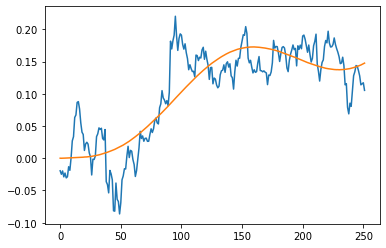

In [24]:
col = np.random.choice(hist_complete.shape[1])
plt.plot(empirical_returns[col])
plt.plot(ipca.inverse_transform(ipca.transform(empirical_returns[col][None, :]))[0])

In [25]:
"""
Auto-Encoding Variational Bayes Network Architecture
"""

import torch
import torch.nn as nn


# VAE with one stochastic layer z
class VAE(nn.Module):

    def __init__(self, args, d, h_num, scaled=True):
        super(VAE, self).__init__()
        self.dim = d
        self.Nz = args.Nz
        self.hid_num = h_num
        self.output_type = args.decoder_type
        self.scaled_mean = scaled
        self.fc1 = nn.Linear(d, h_num)
        self.fc2_mu = nn.Linear(h_num, args.Nz)
        self.fc2_sigma = nn.Linear(h_num, args.Nz)
        self.fc3 = nn.Linear(args.Nz, h_num)
        if args.decoder_type == 'gaussian':
            self.fc4_mu = nn.Linear(h_num, d)
            self.fc4_sigma = nn.Linear(h_num, d)
        else:
            self.fc4 = nn.Linear(h_num, d)

    def forward(self, x):
        x = x.view(-1, self.dim)
        x = torch.relu(self.fc1(x))
        mu_z = self.fc2_mu(x)
        log_sigma_z = self.fc2_sigma(x)
        eps = torch.randn_like(mu_z)
        x = mu_z + torch.exp(log_sigma_z) * eps
        x = torch.relu(self.fc3(x))
        if self.output_type == 'gaussian':
            if self.scaled_mean:
                mu = torch.sigmoid(self.fc4_mu(x))
            else:
                mu = self.fc4_mu(x)
            log_sigma = self.fc4_sigma(x)
            return mu, mu_z, log_sigma, log_sigma_z
        else:
            x = self.fc4(x)
            return x, mu_z, '_', log_sigma_z

In [26]:
class SP500Dataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, df, m):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.m = m
        self.n = df.shape[1]

    def __len__(self):
        return (self.df.shape[0] - self.m + 1) * self.df.shape[1]

    def __getitem__(self, idx):
        e_idx = np.random.randint(self.m, self.df.shape[0])
        s_idx = e_idx - self.m
        col = np.random.choice(self.df.columns)
        return get_empirical_return(self.df, col, s_idx, e_idx)

In [27]:
import math

def test_function(net, test_n, out_type, testloader, device='cpu'):
    elbo_total = 0.0
    pbar = tqdm(total=len(testloader))
    for i, data in enumerate(testloader, 0):
        pbar.update(1)
        with torch.no_grad():
            test = data.to(device)
            output = net(test.float())

            # the negative KL term
            negative_kl = (torch.ones_like(output[3]) + 2 * output[3] - output[1] * output[1] - torch.exp(
                2 * output[3])).sum(1) / 2

            # the log conditional prob term
            if out_type == 'gaussian':
                test_minus_mu = test - output[0]
                log_p_x_given_z = -torch.ones_like(test).sum(1) * np.log(2 * math.pi) / 2 - output[2].sum(1) / 2 - (
                        test_minus_mu * test_minus_mu / (2 * torch.exp(output[2]))).sum(1)
            else:
                log_p_x_given_z = torch.sum(output[0] * test - torch.log(1 + torch.exp(output[0])), 1)

            # sum of the variational lower bounds
            elbo = negative_kl.sum() + log_p_x_given_z.sum()
            elbo_total += elbo.item()
    return elbo_total / test_n

In [28]:
from sklearn.model_selection import train_test_split
hist_complete_train, hist_complete_test = train_test_split(hist_complete, shuffle=False, test_size=.3)

In [29]:
dim = m
hid_num = 100
train_num = (hist_complete_train.shape[0] - m + 1) * hist_complete_train.shape[1]
test_num = (hist_complete_test.shape[0] - m + 1) * hist_complete_test.shape[1]

In [30]:
from collections import namedtuple
vae_args = namedtuple('vae_args', ['decoder_type', 'input_dim', 'hid_num', 'Nz', 'epochs', 'batch_size'])
VAE_ARGS = vae_args('gaussian', m-1, 100, 3, 100, 128)

In [31]:
train_loader = torch.utils.data.DataLoader(SP500Dataset(hist_complete_train, m), batch_size=VAE_ARGS.batch_size, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(SP500Dataset(hist_complete_test, m), batch_size=VAE_ARGS.batch_size, shuffle=False, num_workers=2)
test_set = SP500Dataset(hist_complete_test, m)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net = VAE(VAE_ARGS, d=VAE_ARGS.input_dim, h_num=VAE_ARGS.hid_num)
net.to(device)
optimizer = torch.optim.Adagrad(net.parameters())

cpu


In [ ]:
import time
# train the model
start = time.time()
for epoch in range(20):
    # test
    if (epoch + 1) % 10 == 0:
        test_elbo = test_function(net, test_num, VAE_ARGS.decoder_type,
                                  test_loader, device=device)
        print('test average ELBO=', test_elbo)

    # iterations
    running_loss = 0.0
    with tqdm(total=len(train_loader.dataset)) as progress_bar:
        for i, data in enumerate(train_loader, 0):
            train = data.to(device)
            optimizer.zero_grad()

            output = net(train.float())

            # the negative KL term
            negative_KL = (torch.ones_like(output[1]) + 2 * output[3] - output[1] * output[1] - torch.exp(
                2 * output[3])).sum(1) / 2

            # the log conditional prob term
            if VAE_ARGS.decoder_type == 'gaussian':
                train_minus_mu = train - output[0]
                log_p_x_given_z = -torch.ones_like(train).sum(1) * np.log(2 * math.pi) / 2 \
                                  - output[2].sum(1) / 2 - (
                                          train_minus_mu * train_minus_mu / (2 * torch.exp(output[2]))).sum(1)
            else:
                log_p_x_given_z = torch.sum(output[0] * train - torch.log(1 + torch.exp(output[0])), 1)

            # update parameters
            loss = -negative_KL.mean() - log_p_x_given_z.mean()
            loss.backward()
            optimizer.step()
            running_loss -= negative_KL.sum().item()
            running_loss -= log_p_x_given_z.sum().item()

            # progress bar
            progress_bar.set_postfix(loss=loss.mean().item())
            progress_bar.update(data.size(0))

    print('[%d] loss: %.3f' % (epoch + 1, running_loss / train_num))


  0%|          | 0/685824 [00:00<?, ?it/s]

[1] loss: 173.199


  0%|          | 0/685824 [00:00<?, ?it/s]

[2] loss: -342.551


  0%|          | 0/685824 [00:00<?, ?it/s]

[3] loss: -362.957


  0%|          | 0/685824 [00:00<?, ?it/s]

[4] loss: -375.974


  0%|          | 0/685824 [00:00<?, ?it/s]

[5] loss: -381.619


  0%|          | 0/685824 [00:00<?, ?it/s]

[6] loss: -384.976


  0%|          | 0/685824 [00:00<?, ?it/s]

In [114]:
for i, data in enumerate(test_loader, 0):
    test = data.to(device)
    break
with torch.no_grad():
    output = net(test.float())

In [117]:
[o.shape for o in output]

[torch.Size([128, 252]),
 torch.Size([128, 2]),
 torch.Size([128, 252]),
 torch.Size([128, 2])]

In [123]:
output[0] - test[0]

tensor([[ 0.0312,  0.0136,  0.0607,  ...,  0.0639,  0.0335,  0.0421],
        [ 0.0321,  0.0154,  0.0634,  ...,  0.1301,  0.0996,  0.1086],
        [ 0.0344,  0.0203,  0.0707,  ...,  0.2054,  0.1748,  0.1849],
        ...,
        [ 0.0310,  0.0131,  0.0600,  ...,  0.2521,  0.2238,  0.2321],
        [ 0.0309,  0.0130,  0.0598,  ...,  0.1768,  0.1471,  0.1571],
        [ 0.0309,  0.0129,  0.0597,  ..., -0.0435, -0.0735, -0.0658]],
       dtype=torch.float64)

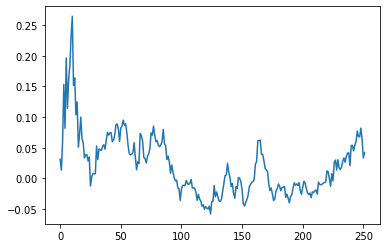

In [130]:
plt.plot((output[0] - test[0])[0].numpy())

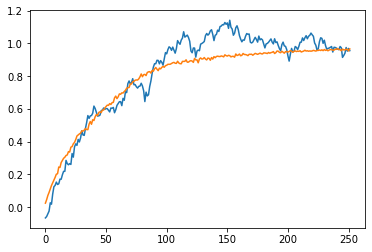

In [184]:
idx = np.random.randint(test.shape[0])
plt.plot(test[idx].numpy())
plt.plot(output[0][idx].numpy())